In [504]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

netflix= pd.read_csv("/content/netflix_titles.csv")
movies_1=pd.DataFrame(netflix[netflix["type"]=="Movie"])
TV_1=pd.DataFrame(netflix[netflix["type"]=="TV Show"])

In [505]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [506]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [507]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [508]:
movies_1.listed_in.fillna(value="unknow", inplace =True)
movies_1.listed_in

0                                          Documentaries
6                               Children & Family Movies
7       Dramas, Independent Movies, International Movies
9                                       Comedies, Dramas
12                          Dramas, International Movies
                              ...                       
8801             Dramas, International Movies, Thrillers
8802                      Cult Movies, Dramas, Thrillers
8804                             Comedies, Horror Movies
8805                  Children & Family Movies, Comedies
8806      Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 6131, dtype: object

In [509]:
TV_1.listed_in.fillna(value="unknow", inplace = True)
TV_1.listed_in

1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
5                      TV Dramas, TV Horror, TV Mysteries
                              ...                        
8795                               Anime Series, Kids' TV
8796                    International TV Shows, TV Dramas
8797                                             Kids' TV
8800    International TV Shows, Romantic TV Shows, TV ...
8803               Kids' TV, Korean TV Shows, TV Comedies
Name: listed_in, Length: 2676, dtype: object

In [510]:
netflix.date_added.fillna(value="unknow", inplace =True)
netflix.date_added

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8807, dtype: object

In [511]:
netflix.country.fillna(value="unknown", inplace =True)
netflix.country

0       United States
1        South Africa
2             unknown
3             unknown
4               India
            ...      
8802    United States
8803          unknown
8804    United States
8805    United States
8806            India
Name: country, Length: 8807, dtype: object

In [512]:
netflix.rating.fillna(value="unkown", inplace=True)
netflix.rating

0       PG-13
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
8802        R
8803    TV-Y7
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 8807, dtype: object

In [513]:
netflix.date_added.fillna(value="unkown", inplace=True)
netflix.date_added

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8807, dtype: object

In [514]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country            0
date_added         0
release_year       0
rating             0
duration           3
listed_in          0
description        0
dtype: int64

In [515]:
netflix.reset_index(inplace=True, drop = True)

In [516]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country            0
date_added         0
release_year       0
rating             0
duration           3
listed_in          0
description        0
dtype: int64

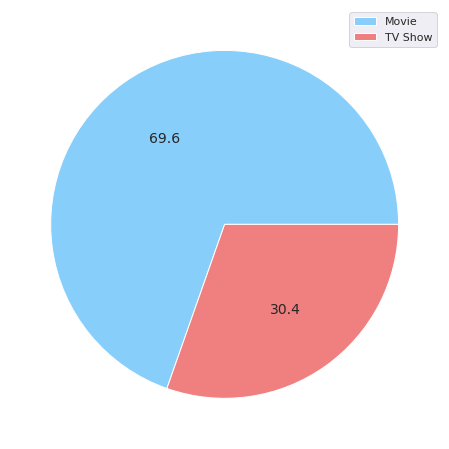

In [517]:
plt.figure(figsize=(10, 8))

plt.pie(netflix.type.value_counts(), labels = netflix.type.value_counts().index, labeldistance=None, autopct="%.1f",textprops={'fontsize': 14},colors=['lightskyblue', 'lightcoral'])
plt.legend()
plt.show()

In [518]:
last_decade = netflix[["type", "release_year"]]
last_decade = last_decade.rename(columns = {"release_year" : "Release Year"})
last_decade = last_decade[last_decade["Release Year"]>=2010]
last_decade

,type,Release Year
0,Movie,2020
1,TV Show,2021
2,TV Show,2021
3,TV Show,2021
4,TV Show,2021
...,...,...
8798,Movie,2014
8800,TV Show,2012
8801,Movie,2015
8803,TV Show,2018


In [519]:
last_decade_df = last_decade.groupby("Release Year")["type"].size().reset_index()
last_decade_df = pd.DataFrame(last_decade_df)
last_decade_df

,Release Year,type
0,2010,194
1,2011,185
2,2012,237
3,2013,288
4,2014,352
5,2015,560
6,2016,902
7,2017,1032
8,2018,1147
9,2019,1030


In [520]:
last_decade_df.rename(columns = {"type": "Total Content"}, inplace = True)

In [521]:
netflix.date_added.fillna(value="NaN", inplace = True)
netflix.date_added

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8807, dtype: object

In [522]:
netflix[netflix.date_added.str.contains("nown")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [523]:
num = netflix["date_added"].str[-4:]
print(num)
num = num.replace('know','0')

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
8802    2019
8803    2019
8804    2019
8805    2020
8806    2019
Name: date_added, Length: 8807, dtype: object


In [524]:
netflix['upload'] = num.astype(int)

In [525]:
last_ten_year=netflix[["type","upload"]]
last_ten_year=last_ten_year[last_ten_year["upload"] >= 2012]
last_ten_year

,type,upload
0,Movie,2021
1,TV Show,2021
2,TV Show,2021
3,TV Show,2021
4,TV Show,2021
...,...,...
8802,Movie,2019
8803,TV Show,2019
8804,Movie,2019
8805,Movie,2020


In [526]:
last_ten_year.groupby("upload")["type"].value_counts()

upload  type   
2012    Movie         3
2013    Movie         6
        TV Show       5
2014    Movie        19
        TV Show       5
2015    Movie        56
        TV Show      26
2016    Movie       253
        TV Show     176
2017    Movie       839
        TV Show     349
2018    Movie      1237
        TV Show     412
2019    Movie      1424
        TV Show     592
2020    Movie      1284
        TV Show     595
2021    Movie       993
        TV Show     505
Name: type, dtype: int64

In [527]:
last_ten =last_ten_year.groupby("upload")["type"].size().reset_index()
last_ten = last_ten[last_ten.upload != '0']
last_ten_year_df = pd.DataFrame(last_ten_year)
last_ten_year_df

,type,upload
0,Movie,2021
1,TV Show,2021
2,TV Show,2021
3,TV Show,2021
4,TV Show,2021
...,...,...
8802,Movie,2019
8803,TV Show,2019
8804,Movie,2019
8805,Movie,2020


Text(0.5, 1.0, 'Netflix Upload by Type')

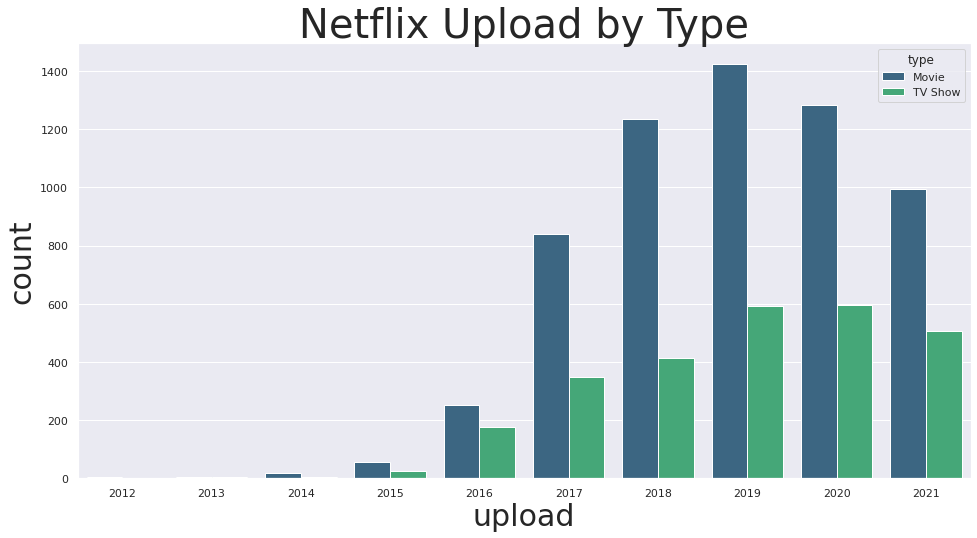

In [528]:
plt.figure(figsize=(16,8))
sns.countplot(x="upload", data=last_ten_year, hue="type", palette="viridis")
plt.xlabel("upload",size=30)
plt.ylabel("count", size=30)
plt.title("Netflix Upload by Type", size = 40)

넷플릭스에 업로드 된 영상들의 연도별 변화 추이를 볼 수 있는 막대 그래프이다.
2019년에 가장 높은 값을 기록하였으며, 이후 팬데믹의 현상으로 인해 20년도에도 높은 기록을 유지하였다. 또한 넷플릭스에 높은 투자금도 주요 요인이 되었다.

In [529]:
net_rating = pd.DataFrame()
net_rating = netflix['rating'].str.split(',',expand=True).stack()
net_rating = net_rating.to_frame()
net_rating.columns=['Rating']
net_rating 

,,Rating
0,0,PG-13
1,0,TV-MA
2,0,TV-MA
3,0,TV-MA
4,0,TV-MA
...,...,...
8802,0,R
8803,0,TV-Y7
8804,0,R
8805,0,PG


In [530]:
ratinges=net_rating.groupby(['Rating']).size().reset_index(name='Total Rating')
ratinges=ratinges[ratinges.Rating !='unknown']
ratinges=ratinges.sort_values(by=['Total Rating'],ascending=False)
all_rating=ratinges
all_rating

,Rating,Total Rating
11,TV-MA,3207
9,TV-14,2160
12,TV-PG,863
8,R,799
7,PG-13,490
14,TV-Y7,334
13,TV-Y,307
6,PG,287
10,TV-G,220
5,NR,80


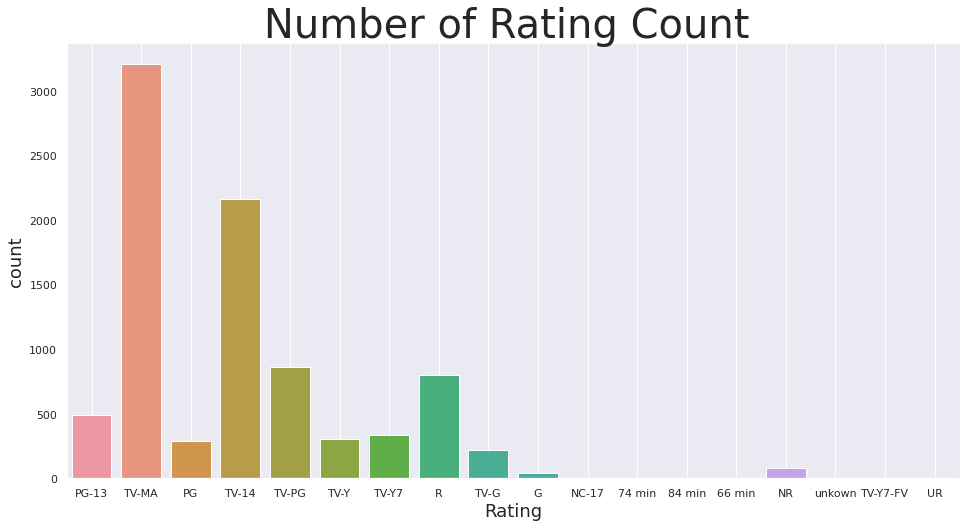

In [531]:
plt.figure(figsize=(16, 8))
sns.countplot(x='rating', data = netflix)
plt.xlabel("Rating", size=18)
plt.ylabel("count", size=18)
plt.title("Number of Rating Count ", size =40 )
plt.grid()

TV-MA 가 가장 높은 수치를 기록하였고, TV-14, R 등급 순으로 높은 수치를 보였다.  
대체적으로 청소년 및 성인 고객층을 보유하고 있음을 확인할 수 있었다.   

In [532]:
rating_m=pd.DataFrame(netflix[netflix["rating"]=="TV-MA"])
rating_m.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,upload
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",unknown,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021


In [533]:
rating_ten=pd.DataFrame(netflix[netflix["rating"]=="TV-14"])
rating_ten.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,upload
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021
18,s19,Movie,Intrusion,Adam Salky,"Freida Pinto, Logan Marshall-Green, Robert Joh...",unknown,"September 22, 2021",2021,TV-14,94 min,Thrillers,After a deadly home invasion at a couple’s new...,2021
20,s21,TV Show,Monsters Inside: The 24 Faces of Billy Milligan,Olivier Megaton,NaN,unknown,"September 22, 2021",2021,TV-14,1 Season,"Crime TV Shows, Docuseries, International TV S...","In the late 1970s, an accused serial rapist cl...",2021
21,s22,TV Show,Resurrection: Ertugrul,NaN,"Engin Altan Düzyatan, Serdar Gökhan, Hülya Dar...",Turkey,"September 22, 2021",2018,TV-14,5 Seasons,"International TV Shows, TV Action & Adventure,...",When a good deed unwittingly endangers his cla...,2021
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021


In [534]:
rating_pg=pd.DataFrame(netflix[netflix["rating"]=="TV-PG"])
rating_pg.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,upload
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",unknown,"September 22, 2021",2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...,2021
22,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...",unknown,"September 21, 2021",1996,TV-PG,161 min,"Comedies, International Movies",Newly divorced and denied visitation rights wi...,2021
26,s27,Movie,Minsara Kanavu,Rajiv Menon,"Arvind Swamy, Kajol, Prabhu Deva, Nassar, S.P....",unknown,"September 21, 2021",1997,TV-PG,147 min,"Comedies, International Movies, Music & Musicals",A tangled love triangle ensues when a man fall...,2021
50,s51,TV Show,Dharmakshetra,NaN,"Kashmira Irani, Chandan Anand, Dinesh Mehta, A...",India,"September 15, 2021",2014,TV-PG,1 Season,"International TV Shows, TV Dramas, TV Sci-Fi &...","After the ancient Great War, the god Chitragup...",2021
53,s54,Movie,InuYasha the Movie 4: Fire on the Mystic Island,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...",Japan,"September 15, 2021",2004,TV-PG,88 min,"Action & Adventure, Anime Features, Internatio...","Ai, a young half-demon who has escaped from Ho...",2021


In [535]:
x_ma = pd.DataFrame()
x_ma = rating_m['listed_in'].str.split(', ',expand=True).stack()
x_ma = x_ma.to_frame()
x_ma.columns=['Listed_in']
x_ma

Listed_in
1    0  International TV Shows
     1               TV Dramas
     2            TV Mysteries
2    0          Crime TV Shows
     1  International TV Shows
...                        ...
8798 1                  Dramas
     2    International Movies
8801 0                  Dramas
     1    International Movies
     2               Thrillers

[7310 rows x 1 columns]

In [536]:
xx_ma=x_ma.groupby(['Listed_in']).size().reset_index(name='Top Listed in')
xx_ma=xx_ma[xx_ma.Listed_in !='unknown']
xx_ma=xx_ma.sort_values(by=['Top Listed in'],ascending=False)
xx_ma_top_5=xx_ma.head(5)
xx_ma_top_5

,Listed_in,Top Listed in
16,International Movies,1130
12,Dramas,830
17,International TV Shows,714
33,TV Dramas,434
7,Comedies,431


In [537]:
tv_ma = px.bar(xx_ma_top_5, x='Top Listed in',y='Listed_in',title='[Top 5] TV-MA',color='Listed_in' )

tv_ma.show()

위 그래프는 TV-MA 등급에서의 장르별 관심도를 나타내는 그래프이다.   
Intergnational Movies가 가장 높은 관심을 보였으며 Dramas, International TV Show 순이 였다.  성인들은 국제적인 분야에 관련된 관심도를 보인다는 것을 알 수 있었다.




In [538]:
x_ten = pd.DataFrame()
x_ten = rating_ten['listed_in'].str.split(', ',expand=True).stack()
x_ten = x_ten.to_frame()
x_ten.columns=['Listed_in']
x_ten

Listed_in
8    0      British TV Shows
     1            Reality TV
18   0             Thrillers
20   0        Crime TV Shows
     1            Docuseries
...                      ...
8799 0                Dramas
     1  International Movies
8806 0                Dramas
     1  International Movies
     2      Music & Musicals

[5246 rows x 1 columns]

In [539]:
xx_ten=x_ten.groupby(['Listed_in']).size().reset_index(name='Top Listed in')
xx_ten=xx_ten[xx_ten.Listed_in !='unknown']
xx_ten=xx_ten.sort_values(by=['Top Listed in'],ascending=False)
xx_ten_top_5=xx_ten.head(5)
xx_ten_top_5

,Listed_in,Top Listed in
16,International Movies,1065
12,Dramas,693
17,International TV Shows,472
7,Comedies,465
33,TV Dramas,269


In [540]:
tv_ten = px.bar(xx_ten_top_5, x='Top Listed in',y='Listed_in',title='[Top 5] TV-14',color='Listed_in')
tv_ten.show()

위 그래프는 TV-14 등급에서의 장르별 관심도를 나타내는 그래프이다.   
Intergnational Movies가 압도적인 높은 수치를 보였으며, Dramas, International TV Show 순이 였다.  청소년들 또한 국제적인 영상에 관심이 높았음을 알 수 있다.



In [541]:
x_pg = pd.DataFrame()
x_pg = rating_pg['listed_in'].str.split(', ',expand=True).stack()
x_pg = x_pg.to_frame()
x_pg.columns=['Listed_in']
x_pg

Listed_in
13   0  Children & Family Movies
     1                  Comedies
22   0                  Comedies
     1      International Movies
26   0                  Comedies
...                          ...
8796 0    International TV Shows
     1                 TV Dramas
8800 0    International TV Shows
     1         Romantic TV Shows
     2                 TV Dramas

[1908 rows x 1 columns]

In [542]:
xx_pg=x_pg.groupby(['Listed_in']).size().reset_index(name='Top Listed in')
xx_pg=xx_pg[xx_pg.Listed_in !='unknown']
xx_pg=xx_pg.sort_values(by=['Top Listed in'],ascending=False)
xx_pg_top_5=xx_pg.head(5)
xx_pg_top_5

,Listed_in,Top Listed in
16,International Movies,294
12,Dramas,200
10,Documentaries,167
7,Comedies,153
17,International TV Shows,134


In [543]:
tv_pg = px.bar(xx_pg_top_5, x='Top Listed in',y='Listed_in',title='Top 5 TV-PG',color='Listed_in')
tv_pg.show()

위 그래프는 TV-PG 등급에서의 장르별 관심도를 나타내는 그래프이다.   
Intergnational Movies가 압도적인 높은 수치를 보였으며, Dramas, International TV Show 순이 였다. 13세 이상의 10대들도 국제적인 영상물에 관심이 높은 것으로 보인다.

In [544]:
net_country = pd.DataFrame()
net_country = netflix['country'].str.split(',',expand=True).stack()
net_country = net_country.to_frame()
net_country.columns=['Country']
net_country 

,,Country
0,0,United States
1,0,South Africa
2,0,unknown
3,0,unknown
4,0,India
...,...,...
8802,0,United States
8803,0,unknown
8804,0,United States
8805,0,United States


In [545]:
countries=net_country.groupby(['Country']).size().reset_index(name='Total Content')
countries=countries[countries.Country !='unknown']
countries=countries.sort_values(by=['Total Content'],ascending=False)
countries_top_15=countries.head(15)
countries_top_15

,Country,Total Content
191,United States,3211
141,India,1008
190,United Kingdom,628
106,United States,479
122,Canada,271
148,Japan,259
132,France,212
179,South Korea,211
34,France,181
181,Spain,181


In [546]:
countries

,Country,Total Content
191,United States,3211
141,India,1008
190,United Kingdom,628
106,United States,479
122,Canada,271
...,...,...
121,Cameroon,1
57,Lithuania,1
164,Paraguay,1
56,Liechtenstein,1


In [547]:
fig = px.bar(countries_top_15, x='Total Content',y='Country',title='Top 15 countries',color='Country')
fig.show()

위 그래프는 각 국가들이 발매한 영상들의 갯수를 통계낸 막대그래프이다. 그래프에선, United States가 압도적으로 많은 영상을 발매한 것을 확인할 수 있으며, 뒤이어 India가 높은 수치를 기록하였다. 그 이외에도 다양한 나라의 영상이 있다는 것을 알 수 있었다.

In [548]:
movies_1_listed_in = movies_1.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)


In [549]:
tv_listed_in = TV_1.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

In [550]:
net_listed_in = pd.DataFrame()
net_listed_in = movies_1['listed_in'].str.split(',',expand=True).stack()
net_listed_in = net_listed_in.to_frame()
net_listed_in.columns=['Listed_in']
net_listed_in

Listed_in
0    0             Documentaries
6    0  Children & Family Movies
7    0                    Dramas
     1        Independent Movies
     2      International Movies
...                          ...
8805 0  Children & Family Movies
     1                  Comedies
8806 0                    Dramas
     1      International Movies
     2          Music & Musicals

[13190 rows x 1 columns]

In [551]:
lis=net_listed_in.groupby(['Listed_in']).size().reset_index(name='Top Listed_in')
lis=lis[lis.Listed_in !='unknown']
lis=lis.sort_values(by=['Top Listed_in'],ascending=False)
lis_top_5=lis.head(5)
lis_top_5

,Listed_in,Top Listed_in
10,International Movies,2624
25,Dramas,1600
22,Comedies,1210
18,Action & Adventure,859
24,Documentaries,829


In [552]:
fig2 = px.bar(lis_top_5, x='Top Listed_in',y='Listed_in',title='[Top 5] listed_in',color='Listed_in')
fig2.show()

위 그래프는 넷플릭스에 있는 영화 중 어떤 장르가 인기있는 Top 5를 나타낸 것이다. 전반적으로 International Movies가 강세를 보였고, 상대적으로 Action&Adventure가 낮은 수치를 기록하였다.

In [553]:
net_tv_in = pd.DataFrame()
net_tv_in = TV_1['listed_in'].str.split(', ',expand=True).stack()
net_tv_in = net_tv_in.to_frame()
net_tv_in.columns=['Listed_in']
net_tv_in

Listed_in
1    0  International TV Shows
     1               TV Dramas
     2            TV Mysteries
2    0          Crime TV Shows
     1  International TV Shows
...                        ...
8800 1       Romantic TV Shows
     2               TV Dramas
8803 0                Kids' TV
     1         Korean TV Shows
     2             TV Comedies

[6133 rows x 1 columns]

In [554]:
tvlis=net_tv_in.groupby(['Listed_in']).size().reset_index(name='Top Listed in')
tvlis=tvlis[tvlis.Listed_in !='unknown']
tvlis=tvlis.sort_values(by=['Top Listed in'],ascending=False)
tvlis_top_5=tvlis.head(5)
tvlis_top_5

,Listed_in,Top Listed in
5,International TV Shows,1351
15,TV Dramas,763
14,TV Comedies,581
3,Crime TV Shows,470
6,Kids' TV,451


In [555]:
fig3 = px.bar(tvlis_top_5, x='Top Listed in',y='Listed_in',title='Top 5 listed_in',color='Listed_in')
fig3.show()

위 그래프는 넷플릭스에 있는 TV Show 중 어떤 장르가 인기있는 Top 5를 나타낸 것이다. 전반적으로 International Movies가 강세를 보였고, 상대적으로 Kids'TV가 낮은 수치를 기록하였다.

In [557]:
netflix['genre']=netflix['listed_in'].str.split(',').tolist()

In [558]:
pd.DataFrame(netflix['listed_in'].str.split(',').tolist())

,0,1,2
0,Documentaries,None,None
1,International TV Shows,TV Dramas,TV Mysteries
2,Crime TV Shows,International TV Shows,TV Action & Adventure
3,Docuseries,Reality TV,None
4,International TV Shows,Romantic TV Shows,TV Comedies
...,...,...,...
8802,Cult Movies,Dramas,Thrillers
8803,Kids' TV,Korean TV Shows,TV Comedies
8804,Comedies,Horror Movies,None
8805,Children & Family Movies,Comedies,None


In [559]:
TV=netflix[netflix['type']=='TV Show']
test = TV['genre']

In [560]:
from sklearn.preprocessing import MultiLabelBinarizer 
import numpy as np

mlb = MultiLabelBinarizer() #다중라벨이진화로 행에 그 값이 있으면 1 없으면 0
res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)

In [561]:
corr = res.corr()
corr
corr.to_csv('tv_corr.csv')

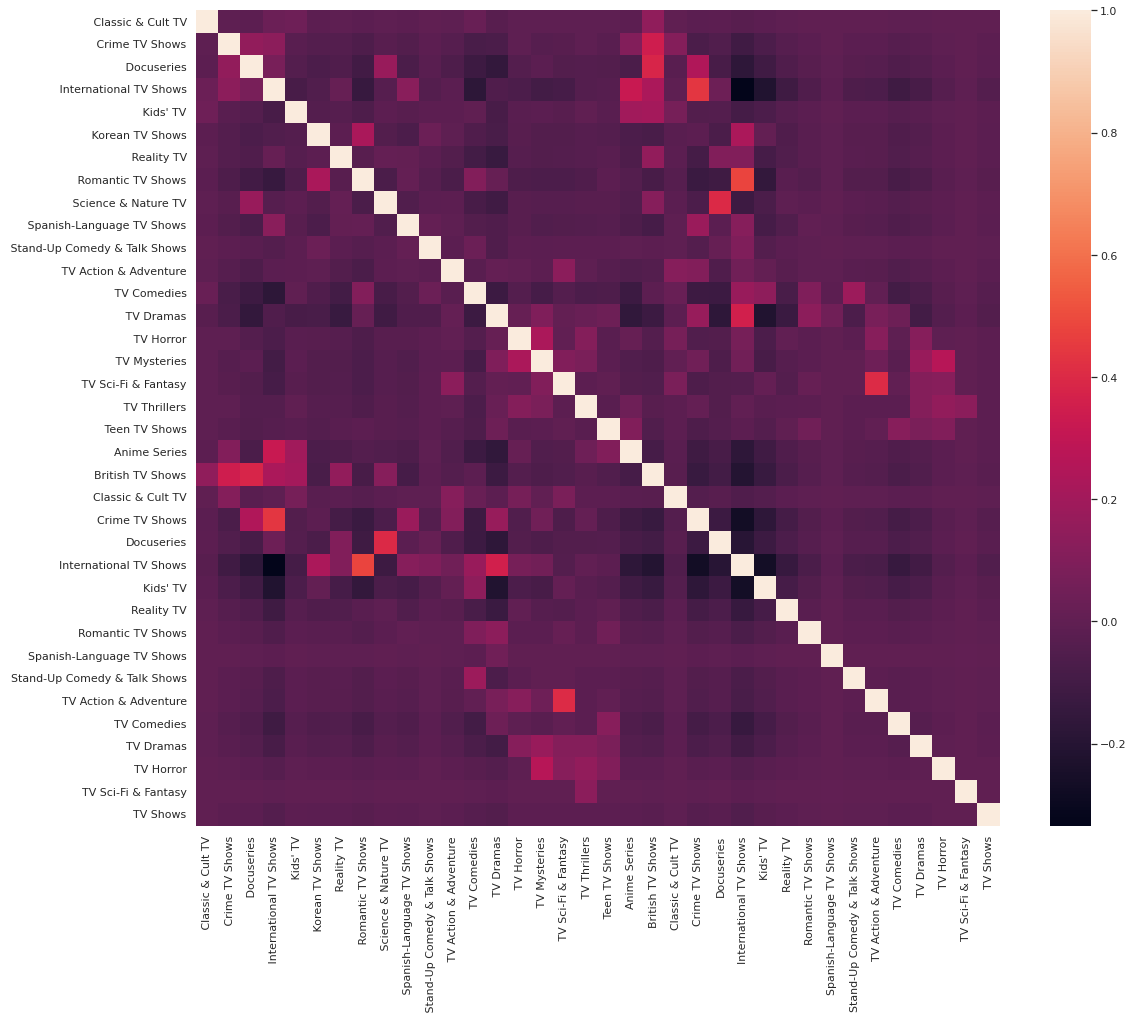

In [562]:
plt.figure(figsize=(18,15))
sns.heatmap(res.corr())

위 히트맵은 여러 장르가 붙어 있는 TV Show 제목이 어떠한 연관성을 지닌 지에 대해 나타낸 것이다. 앞서 나타낸 높은 관심도를 기록한 International TV가 히트맵에서도 높은 상관관계를 보였다. 

In [563]:
netflix['genre']=netflix['listed_in'].str.split(',').tolist()

In [564]:
pd.DataFrame(netflix['listed_in'].str.split(',').tolist())

,0,1,2
0,Documentaries,None,None
1,International TV Shows,TV Dramas,TV Mysteries
2,Crime TV Shows,International TV Shows,TV Action & Adventure
3,Docuseries,Reality TV,None
4,International TV Shows,Romantic TV Shows,TV Comedies
...,...,...,...
8802,Cult Movies,Dramas,Thrillers
8803,Kids' TV,Korean TV Shows,TV Comedies
8804,Comedies,Horror Movies,None
8805,Children & Family Movies,Comedies,None


In [565]:
Movie=netflix[netflix['type']=='Movie']
test = Movie['genre']

In [566]:
from sklearn.preprocessing import MultiLabelBinarizer 
import numpy as np

mlb = MultiLabelBinarizer() #다중라벨이진화로 행에 그 값이 있으면 1 없으면 0
res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)

In [567]:
corr = res.corr()
corr
corr.to_csv('movie_corr.csv')

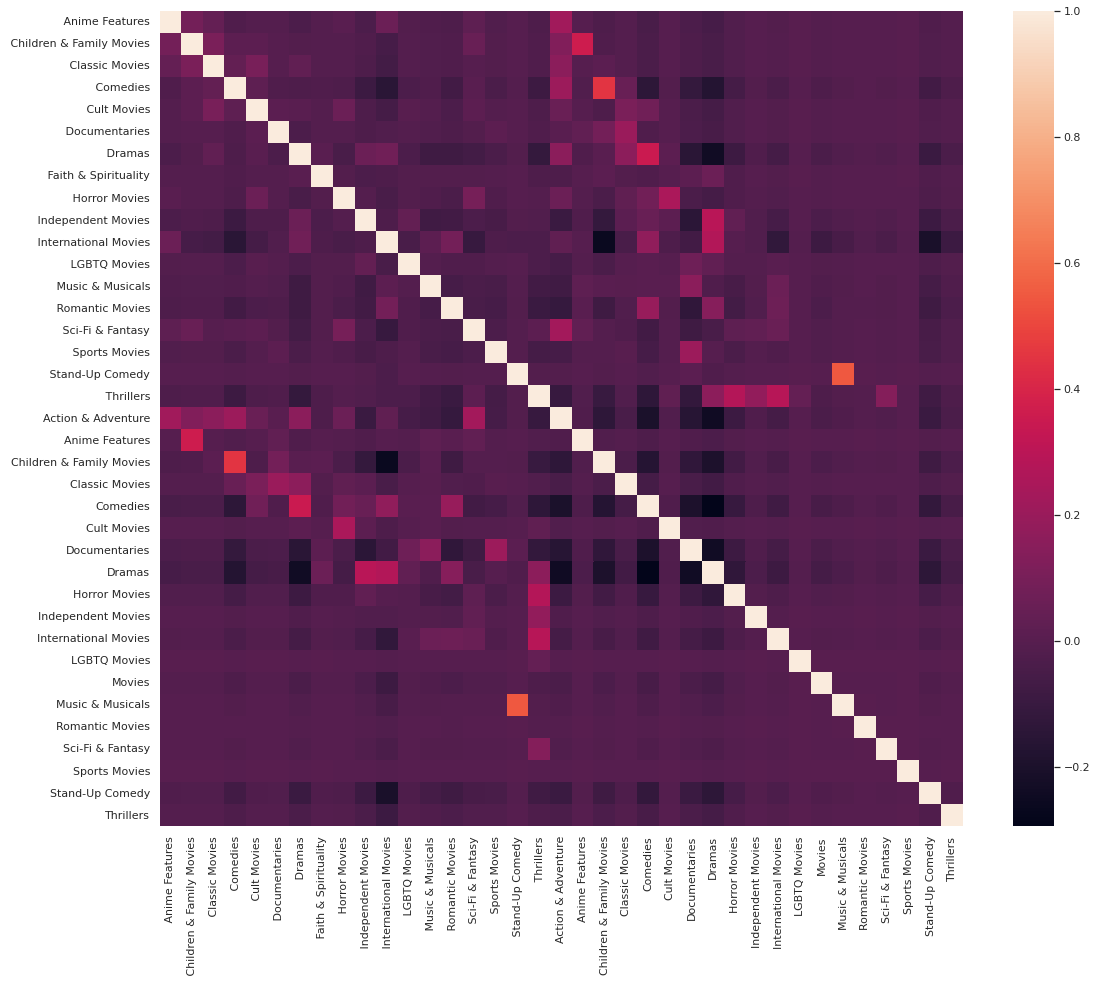

In [568]:
plt.figure(figsize=(18,15))
sns.heatmap(res.corr())

위 히트맵은 여러 장르가 붙어 있는 영화 제목이 어떠한 연관성을 지닌 지에 대해 나타낸 것이다. 앞서 나타낸 높은 관심도를 기록한 International Movies가 히트맵에서도 높은 상관관계를 보였다. 

In [569]:
df_TV = pd.DataFrame(TV)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



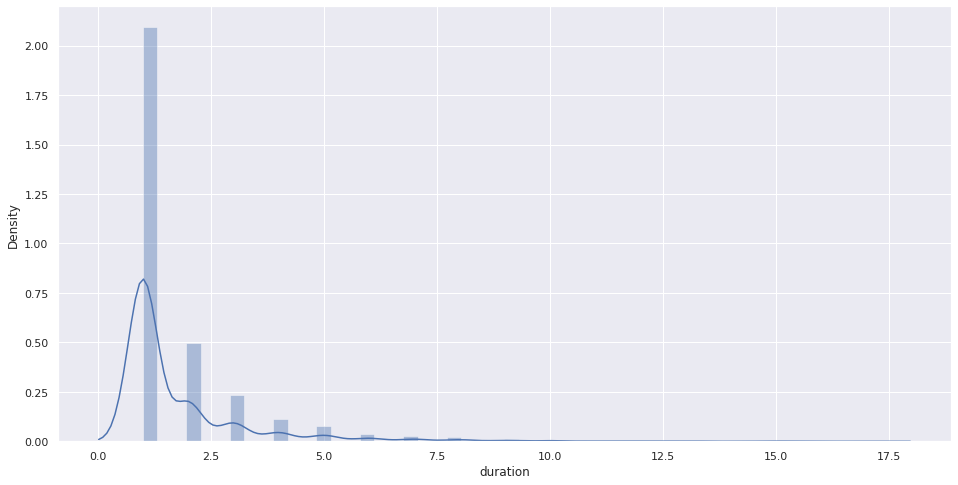

In [570]:
import seaborn as sns, numpy as np
plt.figure(figsize=(16,8))
df_TV['duration']=df_TV['duration'] .str.split(' ').str[0].astype(int)
sns.set_theme()
x = df_TV['duration']
ax = sns.distplot(x)

위 그래프는 넷플릭스에 올라온 TV Show의 Duration에 대해서 나타낸 것이다.
대부분의 프로그램이 시즌 1에서 마무리 되었음을 알 수 있고 장수 프로그램이 많이 존재 하지 않는 것을 알 수 있다. 추가로 긴 season은 17season 까지 있다는 것을 볼 수 있다.